In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import networkx as nx
import random
import math
from netCDF4 import Dataset
from stldecompose import decompose, forecast
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import climate_functions as cf
import network_builder as nb

import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='mohammad5617', api_key='yElRsXEjk0sRoqCmfVBn')

/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [65]:
f_pre = Dataset('precipitation.nc')
pr = f_pre.variables['precip']
lon = f_pre.variables['lon'][:]
lat = f_pre.variables['lat'][:]
pr = np.swapaxes(pr,0,2)

r = np.arange(0.05,1,0.05)

In [92]:
data = pr

In [93]:
#data = pr[14:22,3:7,:]
#data = pr[10:22,3:11,:]
#data = pr[16:23,10:16,:]
#data = pr[0:6,0:6,:]
data = cf.unflatten(data)
data = np.swapaxes(data,0,1)
data = cf.refine_data(data)

In [5]:
data = pr[16:23,10:16,:]
data = cf.unflatten(data)
data = np.swapaxes(data,0,1)
#data = cf.refine_data(data)
MSE,SP,C,density = cf.model(data,model_type ="LR",feature = "normal")

In [6]:
data = pr[16:23,10:16,:]
data = cf.unflatten(data)
data = np.swapaxes(data,0,1)
data = cf.refine_data(data)
MSE_wo,SP_wo,C_wo,density_wo = cf.model(data,model_type ="LR",feature = "normal",WINTER_ONLY=True, first_dec=11)

In [7]:
data = pr[16:23,10:16,:]
data = cf.unflatten(data)
data = np.swapaxes(data,0,1)
data = cf.refine_data(data)
MSE_ds,SP_ds,C_ds,density_ds = cf.model(data,model_type ="LR",feature = "normal",data_type = "STL")

In [8]:
data = pr[16:23,10:16,:]
data = cf.unflatten(data)
data = np.swapaxes(data,0,1)
data = cf.refine_data(data)
MSE_dm,SP_dm,C_dm, density_dm = cf.model(data,model_type ="LR",feature = "normal",data_type = "PA")

In [9]:
data = pr[16:23,10:16,:]
data = cf.unflatten(data)
data = np.swapaxes(data,0,1)
data = cf.refine_data(data)
MSE_dm_wo,SP_dm_wo,C_dm_wo, density_dm_wo = cf.model(data,model_type ="LR",feature = "normal",data_type = "PA",WINTER_ONLY=True, first_dec=11)

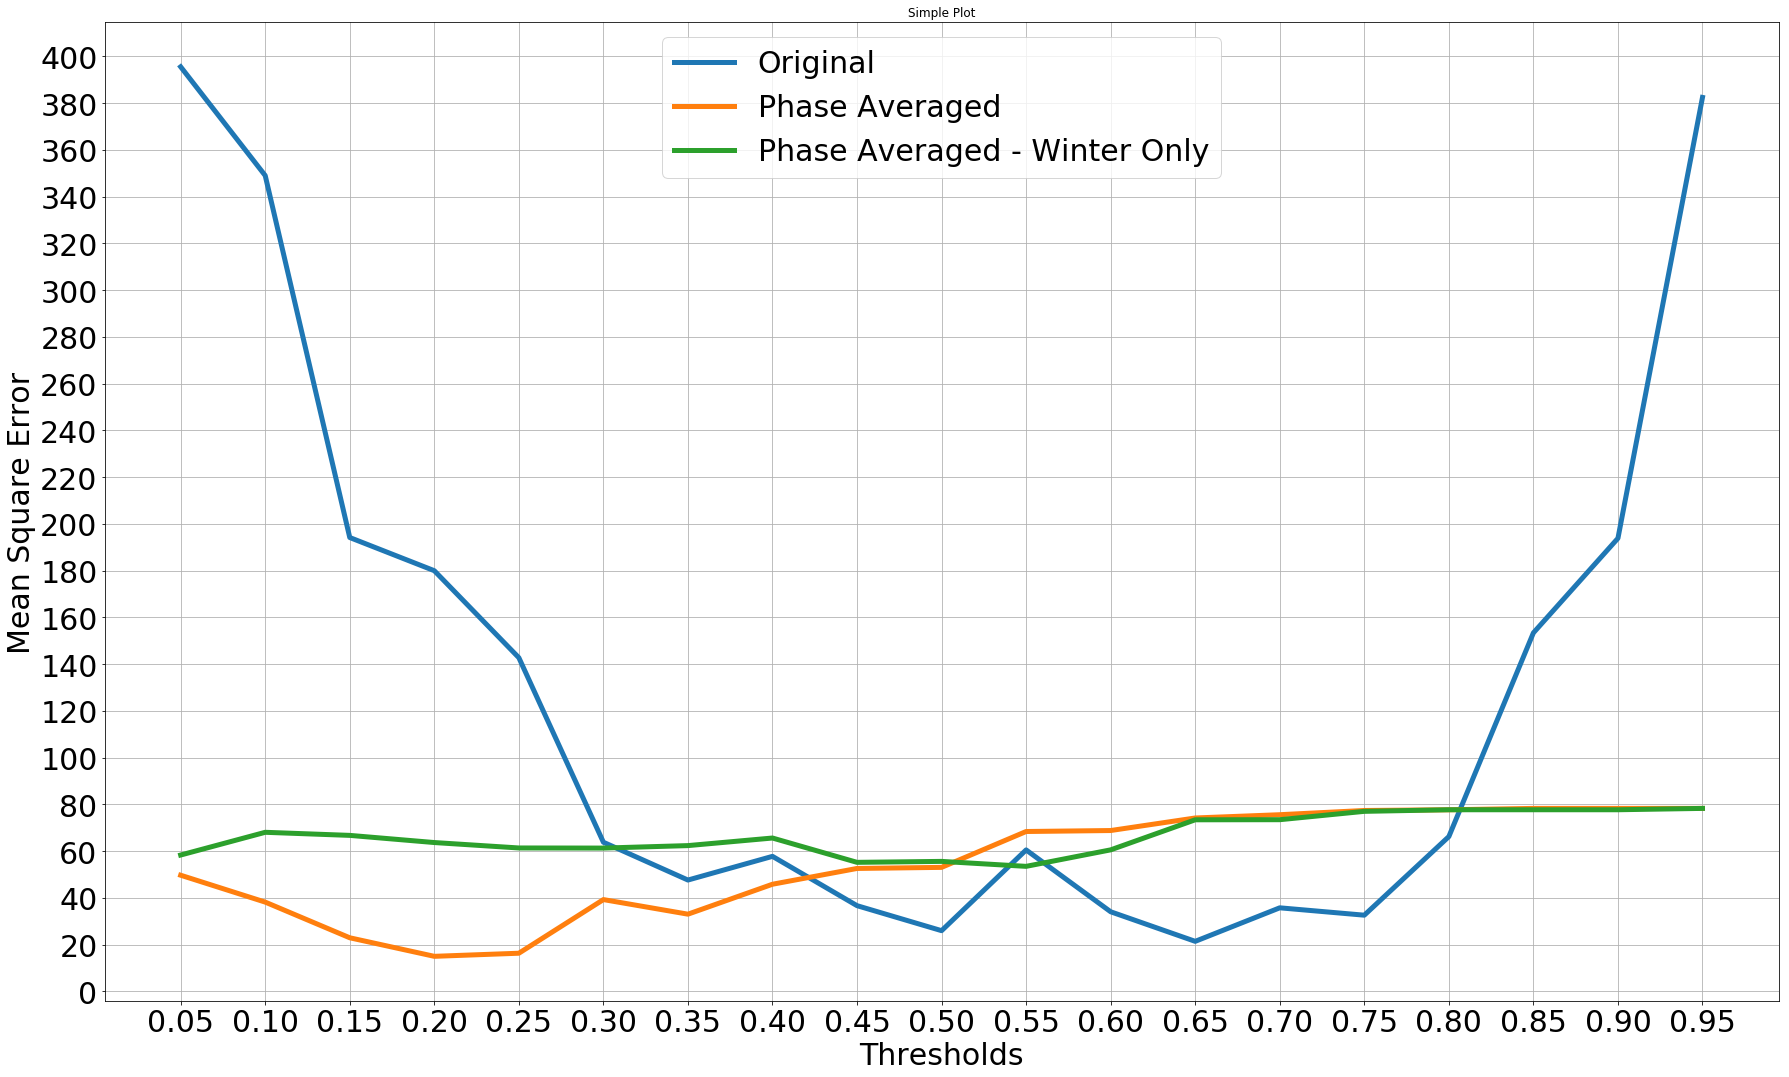

In [41]:
plt.figure(figsize=(30,18))
#plt.rcParams["font.family"] = "cursive"
plt.plot(r, MSE, label='Original',linewidth=5)
plt.plot(r, MSE_dm, label='Phase Averaged',linewidth=5)
plt.plot(r, MSE_dm_wo, label='Phase Averaged - Winter Only',linewidth=5)


plt.xlabel('Thresholds',fontsize=30)
plt.ylabel('Mean Square Error',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Simple Plot")
plt.grid()
plt.yticks(np.arange(0, 401, 20))
plt.xticks(np.arange(0.05, 1, 0.05))
plt.legend(fontsize=30)

plt.show()

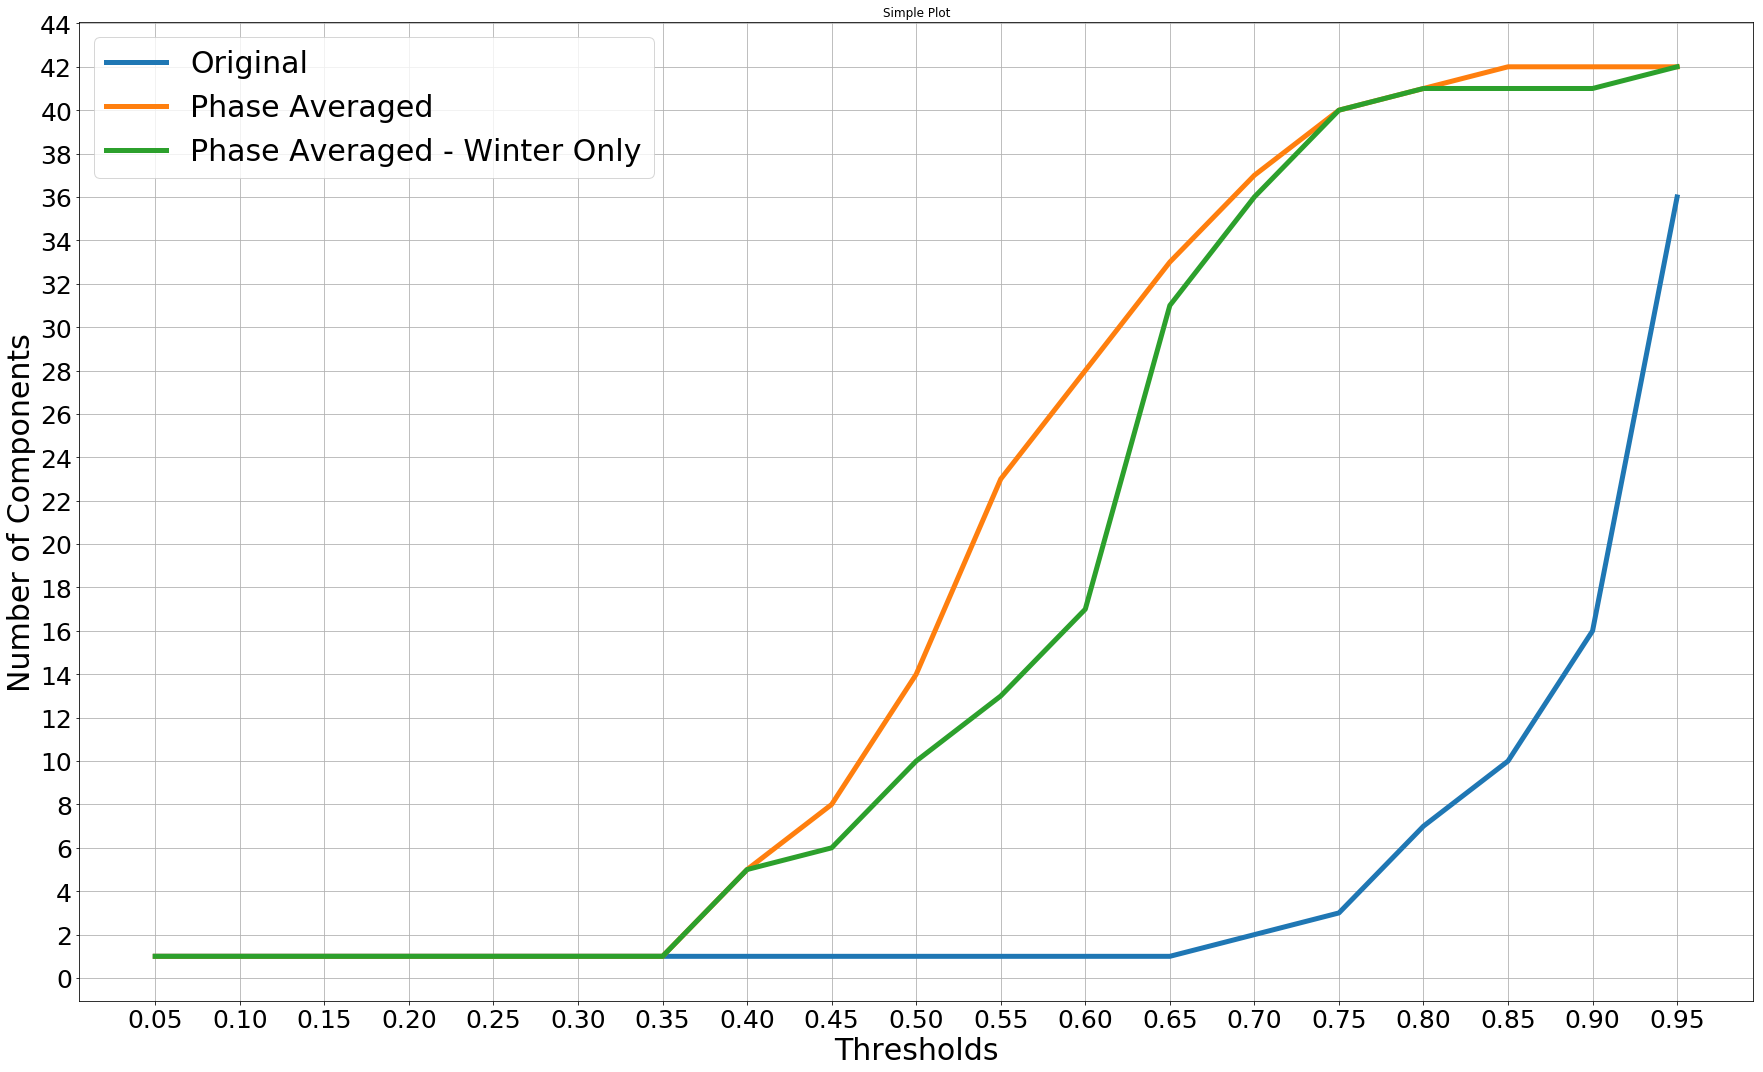

In [36]:
plt.figure(figsize=(30,18))
#plt.rcParams["font.family"] = "cursive"
plt.plot(r, C, label='Original',linewidth=5)
plt.plot(r, C_dm, label='Phase Averaged',linewidth=5)
plt.plot(r, C_dm_wo, label='Phase Averaged - Winter Only',linewidth=5)


plt.xlabel('Thresholds',fontsize=30)
plt.ylabel('Number of Components',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title("Simple Plot")
plt.grid()
plt.yticks(np.arange(0, 45, 2))
plt.xticks(np.arange(0.05, 1, 0.05))
plt.legend(fontsize=30)

plt.show()

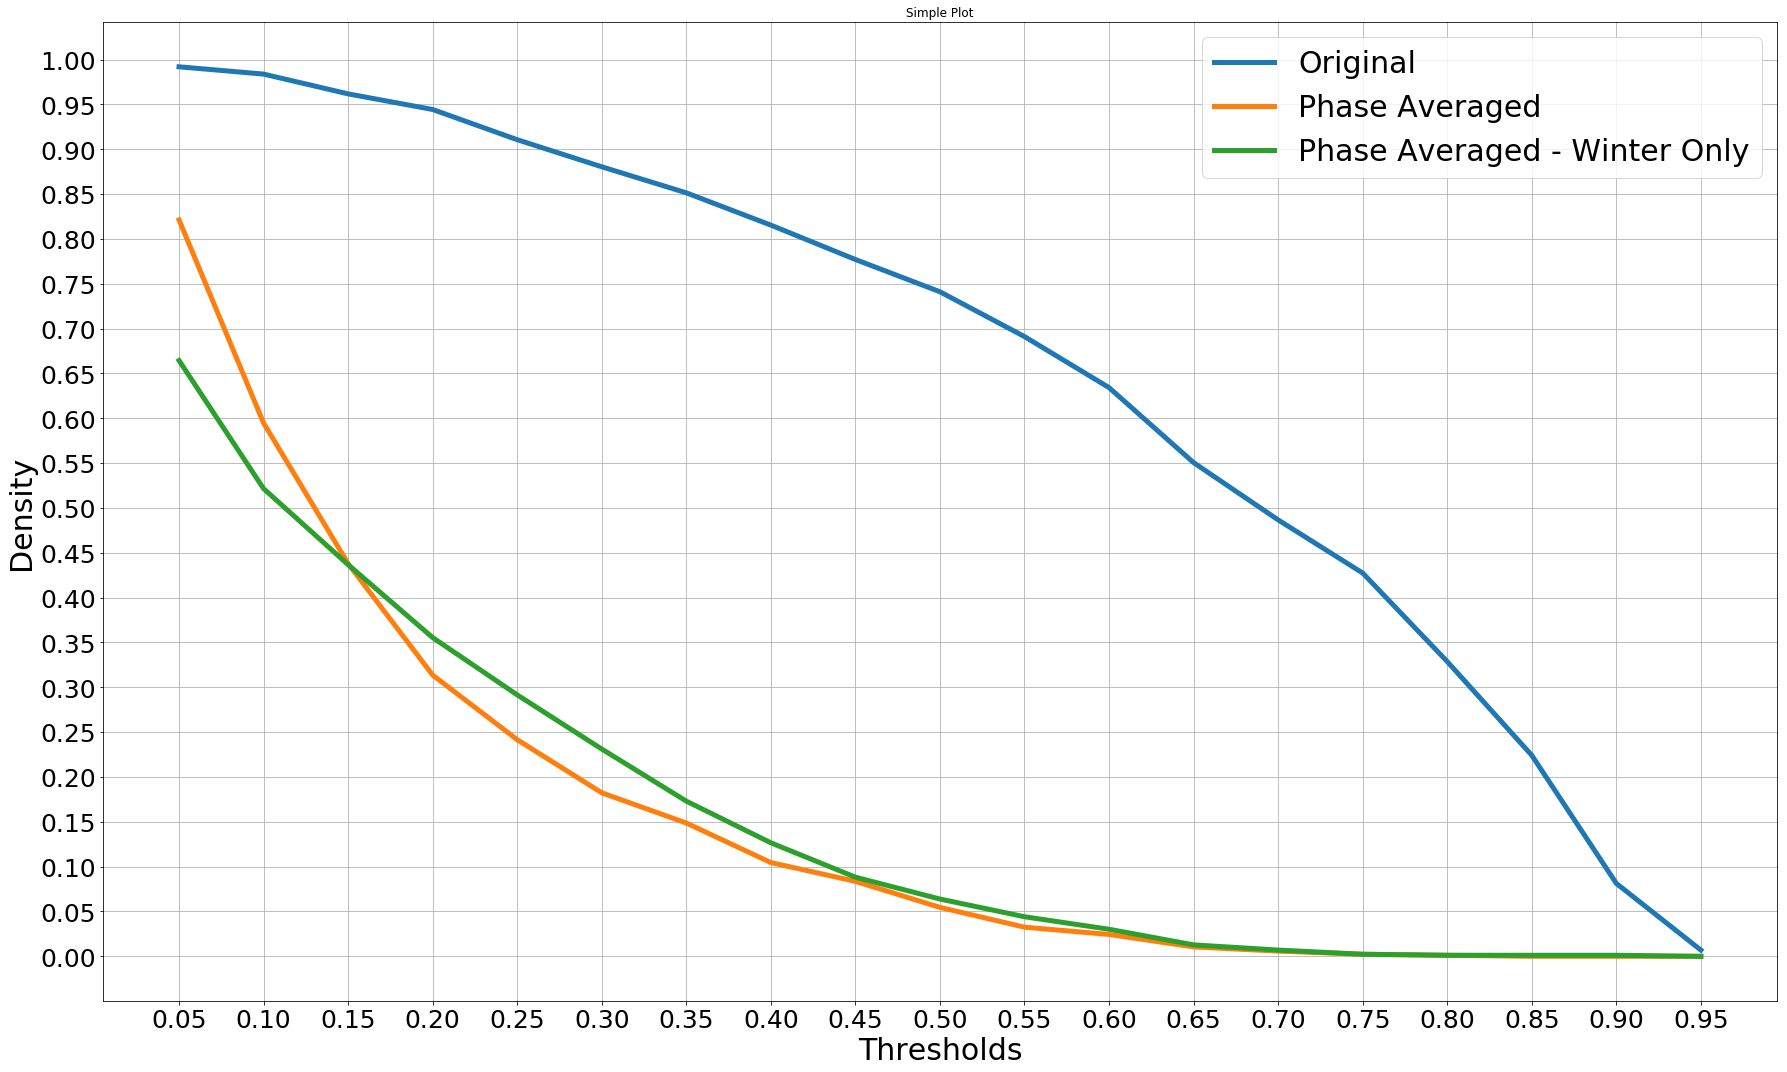

In [43]:
plt.figure(figsize=(30,18))
#plt.rcParams["font.family"] = "cursive"
plt.plot(r, density, label='Original',linewidth=5)
plt.plot(r, density_dm, label='Phase Averaged',linewidth=5)
plt.plot(r, density_dm_wo, label='Phase Averaged - Winter Only',linewidth=5)


plt.xlabel('Thresholds',fontsize=30)
plt.ylabel('Density',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title("Simple Plot")
plt.grid()
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(np.arange(0.05, 1, 0.05))
plt.legend(fontsize=30)

plt.show()

In [254]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from numpy import linspace
from numpy import meshgrid
from matplotlib import animation

In [ ]:
def mask_data(data):
    #d = np.swapaxes(data,0,1)
    mask = data[:,:,-1]
    return(mask!=-9.969209968386869e+36)

In [237]:
f_pre = Dataset('precipitation.nc')
pr = f_pre.variables['precip']
lon = f_pre.variables['lon'][:]
lat = f_pre.variables['lat'][:]
pr = np.swapaxes(pr,0,2)
pr = np.swapaxes(pr,0,1)

r = np.arange(0.05,1,0.05)
data = pr
data = np.flip(data, 0)
mask = mask_data(data)
data = cf.unflatten(data)
data = np.swapaxes(data,0,1)
data = cf.refine_data(data)

In [238]:
vk = dict(G.degree())
lat_number = deg.shape[0]
lon_number = deg.shape[1]
index = 0
for i in range(lat_number):
    for j in range(lon_number):
        if mask[i,j] == False:
            deg[i,j]=np.nan
        else:
            if index in vk.keys():
                deg[i,j]=vk[index]
                index = index + 1

In [256]:
def map_biulder(G,mask):
    lon = np.arange(-23.75,59.0,2.5)
    lat = np.arange(-38.75,40.0,2.5)
    deg = np.zeros((len(lat),len(lon)))
    vk = dict(G.degree())
    lat_number = deg.shape[0]
    lon_number = deg.shape[1]
    index = 0
    for i in range(lat_number):
        for j in range(lon_number):
            if mask[i,j] == False:
                deg[i,j]=np.nan
            else:
                if index in vk.keys():
                    deg[i,j]=vk[index]
                    index = index + 1
    return(deg)

In [267]:
data_deseasonal, data_seasonal = cf.deseasonal_monthly_anomaly(data[start:end-1,:])
data_seasonal = data_seasonal[(end-1) % 12,:]

In [268]:
m = nb.weighted_matrix(data_deseasonal)

In [269]:
lon = np.arange(-23.75,59.0,2.5)
lat = np.arange(-38.75,40.0,2.5)

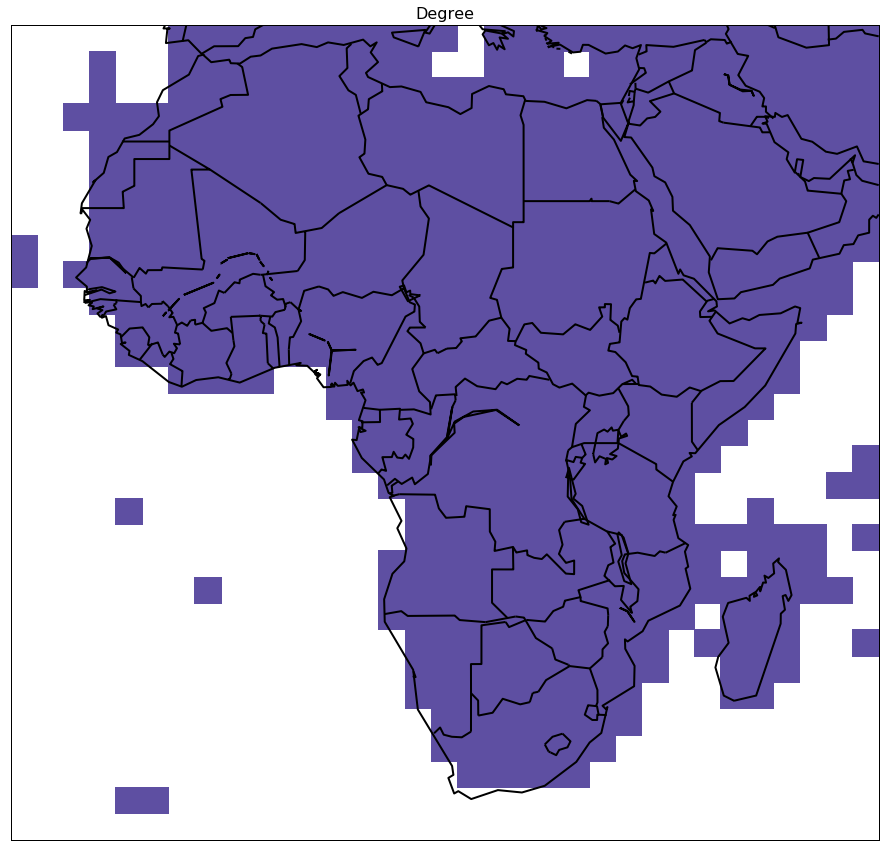

In [270]:
fig = plt.figure(figsize=(30,15))
plt.title("Degree", fontsize=16)
map = Basemap(projection='cyl',
              llcrnrlon=lon[0], 
              llcrnrlat=lat[0], 
              urcrnrlon=lon[-1], 
              urcrnrlat=lat[-1])

map.drawmapboundary()
map.drawcoastlines(linewidth=2)
map.drawcountries(linewidth=2)

#x = linspace(0, lon[-1]+1, deg.shape[1])
#y = linspace(0, lat[-1]+1, deg.shape[0])

xx, yy = meshgrid(lon, lat)
def animate(i):

    G, c = nb.graph_builder_limit(m, 0.05*i)
    deg = map_biulder(G,mask)
    
    cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
    #cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
    #cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
    #cbar.set_label('Degree')
    return cs 
#plt.savefig('degree-centrality .eps')
anim = animation.FuncAnimation(fig, animate,frames=20, interval=500)
anim.save('degree_deseasonal.mp4')

In [ ]:
xc = np.linspace(0, 4, num=5)
yc = np.linspace(0, 4, num=5)
xx, yy = np.meshgrid(xc, yc)
fig = plt.figure(figsize=(20,10))
m, p = weighted_matrix(data)
plt.xlabel("k", fontsize=16)
plt.ylabel("P(k)", fontsize=16)
plt.title("Degree Distribution", fontsize=18)

def animate(i): 
   
    G, c, p1 = graph_builder_fisher(m, 1-0.01*i)
    
    vk = dict(G.degree())
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    #deg = degree_builder(vk, 5)
    #cont = plt.contourf(x, y, z, 25)
    cs = plt.bar(deg, cnt, width=0.80, color='b')

    return cs 

anim = animation.FuncAnimation(fig, animate,frames=100, interval=200)
anim.save('animation_fisher_distribution.mp4')